# Data Discovery
  
This notebook explores the raw datasets; `Mortgage.csv` and `Campaign.csv`; individually.  
This initial, descriptive review of raw data includes:
- Number of rows, columns,
- Data types of fields
- Descriptive statistics of numerical fields
- Cardinality of categorical fields
- Missing values

<a href='#mortgage_dataset'>1. Mortgage dataset<a>   
<a href='#2'>2. Campaign dataset<a>  
<a href='#3'>3. Conclusions</a>  

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

cmap = ListedColormap(['#C1B4AE', '#00864F', '#92140C', '#353238', '#BE5A38'])

## 1. Mortgage dataset <a id='mortgage_dataset'></a>

In [79]:
# Read up data and display the head of dataframe
df_mortgage = pd.read_csv('../data/0_raw/Mortgage.csv')
print(f'Number of rows: {len(df_mortgage)}\nNumber of columns: {len(df_mortgage.columns)}')
df_mortgage.head()

Number of rows: 32561
Number of columns: 18


,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409


### 1.1 Data types of the columns <a id='1_1'></a>
(as pandas inferred during reading them up)

In [3]:
# data types of the fields
df_mortgage.dtypes

full_name                     object
dob                           object
town                          object
paye                          object
salary_band                   object
years_with_employer            int64
months_with_employer           int64
hours_per_week                 int64
capital_gain                   int64
capital_loss                   int64
new_mortgage                  object
sex                           object
religion                      object
relationship                  object
race                          object
native_country                object
workclass                     object
demographic_characteristic     int64
dtype: object

In [4]:
df_mortgage['dob'].iloc[0]

'1979-05-10'

`dob` column is read up as string. Let's convert it to `datetime`

In [5]:
df_mortgage['dob'] = pd.to_datetime(df_mortgage['dob'], yearfirst=True)

### 1.2 Description of numeric columns <a id='1_2'></a>

In [6]:
# Descriptive stats of numeric fields
df_mortgage.describe()

,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,demographic_characteristic
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04
mean,5.170326,5.519425,40.437456,1077.648844,87.303830,1.897784e+05
std,6.437202,3.466831,12.347429,7385.292085,402.960219,1.055500e+05
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.228500e+04
25%,1.000000,2.000000,40.000000,0.000000,0.000000,1.178270e+05
50%,3.000000,6.000000,40.000000,0.000000,0.000000,1.783560e+05
75%,7.000000,9.000000,45.000000,0.000000,0.000000,2.370510e+05
max,57.000000,11.000000,99.000000,99999.000000,4356.000000,1.484705e+06


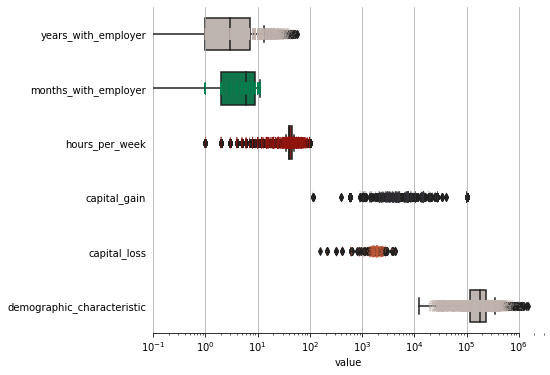

In [20]:
# Univariate plots for the above
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

sns.boxplot(data=df_mortgage.select_dtypes(include='number').melt(var_name='column'),
            x="value",
            y="column", 
            whis=1,
            width=.6,
            palette=cmap.colors);

sns.stripplot(data=df_mortgage.select_dtypes(include='number').melt(var_name='column'),
              x="value",
              y="column",
              size=1, 
              palette=cmap.colors,
              alpha=0.5,
              linewidth=0)


ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set_xlim(left=0.1)
sns.despine(trim=True, left=True)
ax.yaxis.set_tick_params(left = False)

<a id='1_3'></a>
### 1.3 Description of non-numeric columns

In [40]:
# get number of unique values the categorical columns
mortgage_cat_cols_cardinality = []

for cat_col in df_mortgage.select_dtypes(include='object').columns:
    mortgage_cat_cols_cardinality.append([cat_col, len(df_mortgage[cat_col].unique())])
    
df_mortgage_cat_cols_cardinality = pd.DataFrame(mortgage_cat_cols_cardinality,
                                               columns=['Column', 'No of unique values'])

df_mortgage_cat_cols_cardinality

,Column,No of unique values
0,full_name,31169
1,dob,15164
2,town,2649
3,paye,26475
4,salary_band,18326
5,new_mortgage,1
6,sex,2
7,religion,8
8,relationship,6
9,race,5


<AxesSubplot:xlabel='No of unique values', ylabel='Column'>

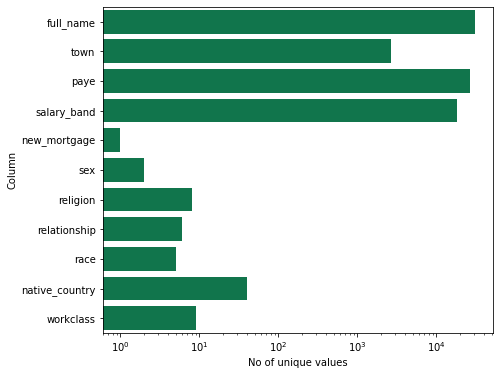

In [34]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

sns.barplot(data=df_mortgage_cat_cols_cardinality,
            y='Column',
            x='No of unique values', 
            orient="h",
            color=cmap.colors[1],
            ax=ax)

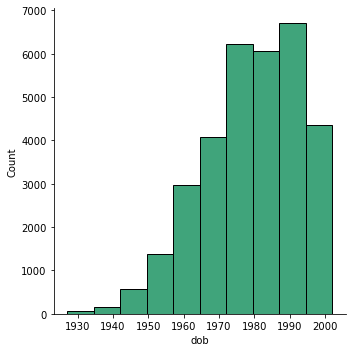

In [30]:
sns.displot(df_mortgage['dob'].dt.year, bins=10, color=cmap.colors[1]);

<a id='1_4'></a>
### 1.4 Missing values

In [58]:
df_mortgage.isna().any() #.any()

full_name                     False
dob                           False
town                          False
paye                          False
salary_band                   False
years_with_employer           False
months_with_employer          False
hours_per_week                False
capital_gain                  False
capital_loss                  False
new_mortgage                  False
sex                           False
religion                      False
relationship                  False
race                          False
native_country                False
workclass                     False
demographic_characteristic    False
dtype: bool

<AxesSubplot:>

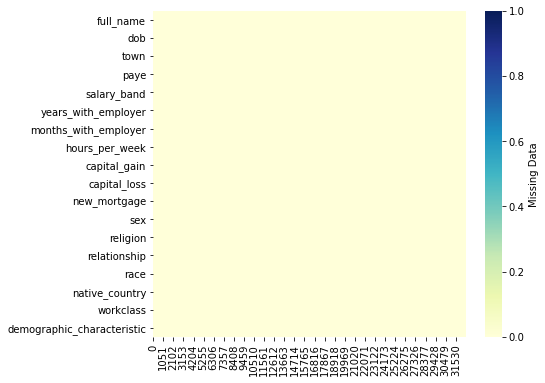

In [56]:
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df_mortgage.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'},
            vmin=0,
            vmax=1)

## 2. Campaign dataset <a id='2'></a>

In [36]:
df_campaign = pd.read_csv('../data/0_raw/Campaign.csv')
print(f'Number of rows: {len(df_campaign)}\nNumber of columns: {len(df_campaign.columns)}')
df_campaign.head()

Number of rows: 32060
Number of columns: 16


,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No
1,2.764970e+12,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,12,5,4,1,smithvanessa@coles.org,No
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,No
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No


<a id='2_1'></a>
### 2.1 Data types of the columns

In [37]:
# data types of the fields
df_campaign.dtypes

participant_id          float64
name_title               object
first_name               object
last_name                object
age                       int64
postcode                 object
marital_status           object
education                object
job_title                object
occupation_level          int64
education_num             int64
familiarity_FB            int64
view_FB                   int64
interested_insurance      int64
company_email            object
created_account          object
dtype: object

<a id='2_2'></a>
### 2.2 Descriptive stats of numeric fields

In [42]:
# Descriptive stats of numeric fields
df_campaign.describe()

,participant_id,age,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance
count,3.206000e+04,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000
mean,4.973681e+12,38.564816,7.757673,13.207611,5.290331,5.170930,0.424891
std,2.883537e+12,13.637532,3.859709,3.353797,2.673795,2.550475,0.494334
min,8.859368e+07,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.493678e+12,28.000000,5.000000,12.000000,3.000000,3.000000,0.000000
50%,4.962955e+12,37.000000,8.000000,13.000000,5.000000,5.000000,0.000000
75%,7.470135e+12,48.000000,10.000000,16.000000,8.000000,7.000000,1.000000
max,9.999820e+12,90.000000,20.000000,21.000000,10.000000,10.000000,1.000000


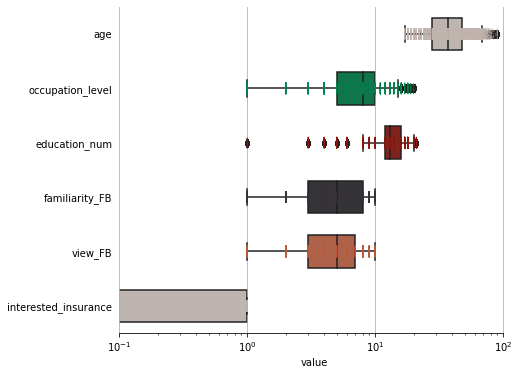

In [45]:
# Univariate plots for the above
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

sns.boxplot(data=df_campaign.drop(columns='participant_id') \
                            .select_dtypes(include='number') \
                            .melt(var_name='column'),
            x="value",
            y="column", 
            whis=1,
            width=.6,
            palette=cmap.colors);

sns.stripplot(data=df_campaign.drop(columns='participant_id') \
                              .select_dtypes(include='number') \
                              .melt(var_name='column'),
              x="value",
              y="column",
              size=1, 
              palette=cmap.colors,
              alpha=0.5,
              linewidth=0)


ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set_xlim(left=0.1)
sns.despine(trim=True, left=True)
ax.yaxis.set_tick_params(left = False)

<a id='2_3'></a>
### 2.3 describe categorical columns

In [46]:
# get number of unique values the categorical columns
campaign_cat_cols_cardinality = []

for cat_col in df_campaign.select_dtypes(include='object').columns:
    campaign_cat_cols_cardinality.append([cat_col, len(df_campaign[cat_col].unique())])
    
df_campaign_cat_cols_cardinality = pd.DataFrame(campaign_cat_cols_cardinality,
                                               columns=['Column', 'No of unique values'])

df_campaign_cat_cols_cardinality

,Column,No of unique values
0,name_title,6
1,first_name,182
2,last_name,500
3,postcode,31398
4,marital_status,7
5,education,16
6,job_title,691
7,company_email,32052
8,created_account,3


<AxesSubplot:xlabel='No of unique values', ylabel='Column'>

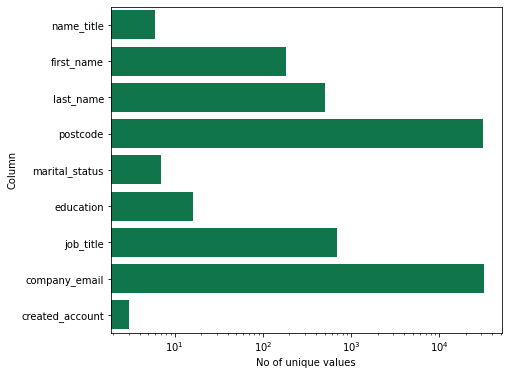

In [47]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

sns.barplot(data=df_campaign_cat_cols_cardinality,
            y='Column',
            x='No of unique values', 
            orient="h",
            color=cmap.colors[1],
            ax=ax)

<a id='2_4'></a>
### 2.4 missing values

In [78]:
df_campaign.isna().sum() #.any()

participant_id              0
name_title              12201
first_name                  0
last_name                   0
age                         0
postcode                    0
marital_status              0
education                   0
job_title                   0
occupation_level            0
education_num               0
familiarity_FB              0
view_FB                     0
interested_insurance        0
company_email               0
created_account         29033
dtype: int64

<AxesSubplot:>

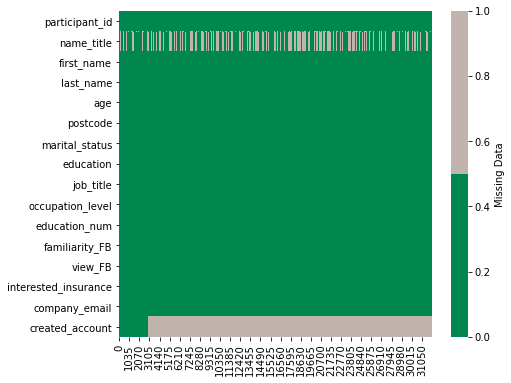

In [76]:
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df_campaign.isna().transpose(),
            cmap=cmap.colors[0:2][::-1],
            cbar_kws={'label': 'Missing Data'},
            vmin=0,
            vmax=1)

## 3. Conclusions <a id='3'></a>
- The datasets are structured, each record represents an observation and each column represents a feature or attribute of the individual observations
- Majority of the `created_account` column is missing value. This column would be our target variable for this project (using a __binary classification__ approach). Normally I would investigate this by reaching out to colleagues and try to understand how the data was collected and what the missing values mean. For this assessment I proceed with the assumption that this data is not available and I will drop these records.